In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [17]:
df=pd.read_csv('/content/drive/MyDrive/FTS-Air Quality Index Prediction/Processed data/city_by_day_final(LI).csv')
df

,Unnamed: 0,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,0,Ahmedabad,1/1/2015,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,149.0,Moderate
1,1,Ahmedabad,1/2/2015,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,144.0,Moderate
2,2,Ahmedabad,1/3/2015,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,302.0,Very Poor
3,3,Ahmedabad,1/4/2015,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,144.0,Moderate
4,4,Ahmedabad,1/5/2015,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,330.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,29526,Visakhapatnam,6/27/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,29527,Visakhapatnam,6/28/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,29528,Visakhapatnam,6/29/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,29529,Visakhapatnam,6/30/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [6]:
#AQI Trends
df['month']=pd.DatetimeIndex(df['Date']).month
df['year']=pd.DatetimeIndex(df['Date']).year

base=2015
df['months']= (df['year']-base)*12+ df['month']
df_AQI_trend= df.groupby(['City','months'])[['AQI']].mean().reset_index()
df_AQI_trend_groups=df_AQI_trend.groupby(df_AQI_trend.City)

def aqi_trend(city):
  fig = plt.figure(figsize = (8,3))
  sns.lineplot(
      data=df_AQI_trend_groups.get_group(city),
      x="months", y="AQI",color='green'
  )
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.title(city+" city AQI trend",fontweight="bold")
  plt.xlim([0,70])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py

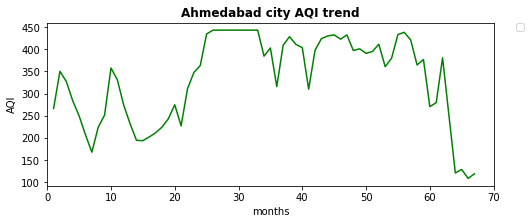

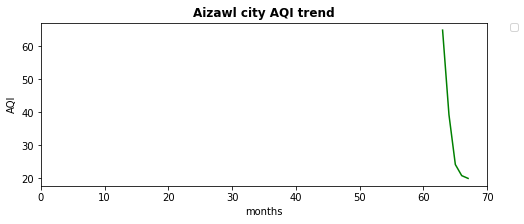

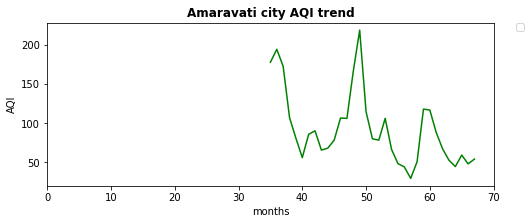

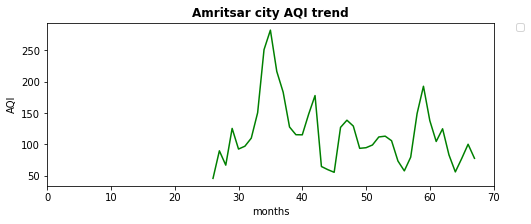

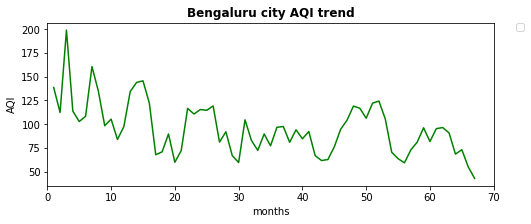

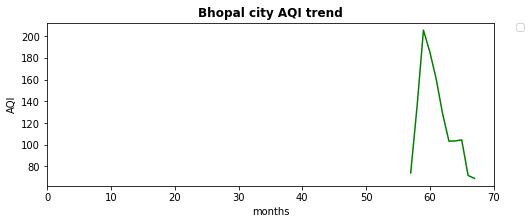

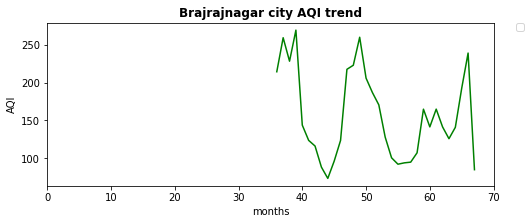

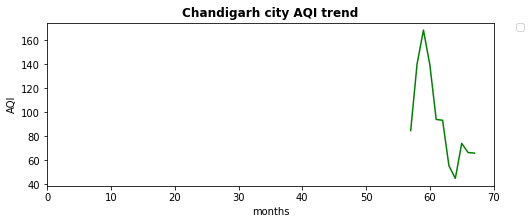

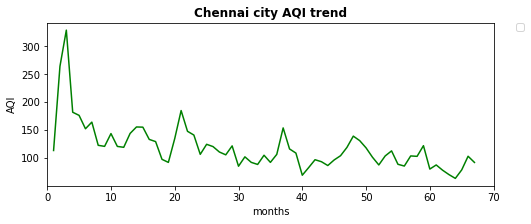

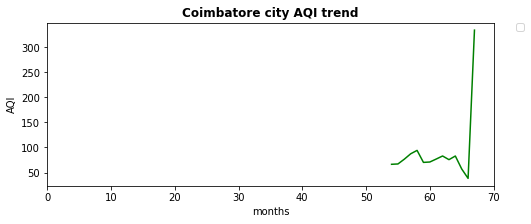

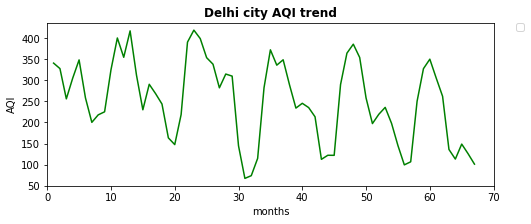

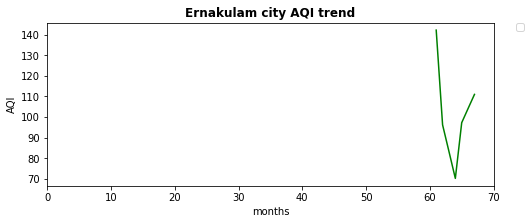

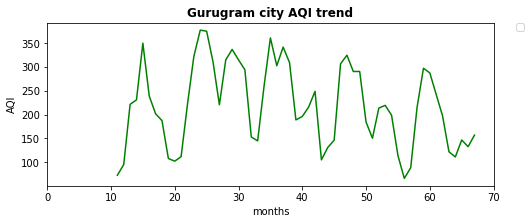

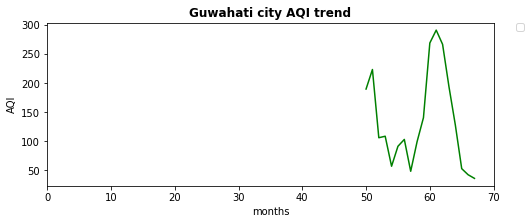

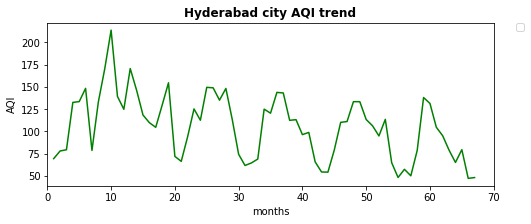

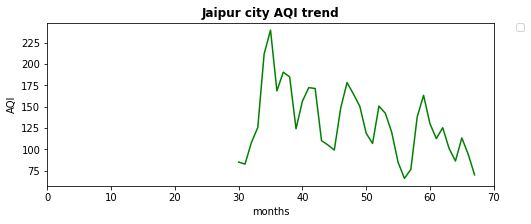

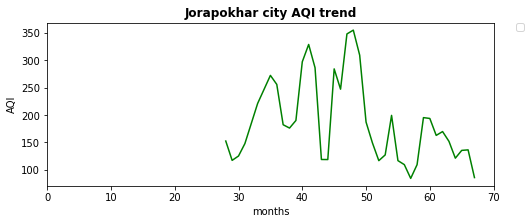

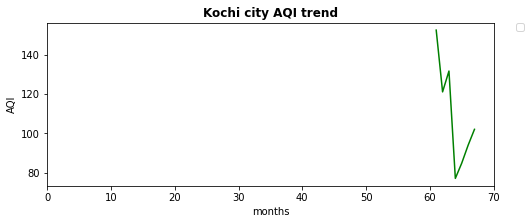

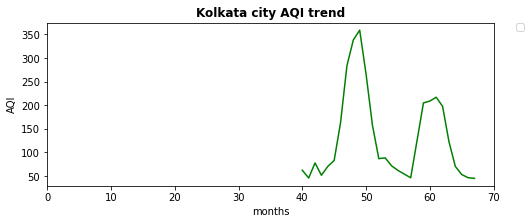

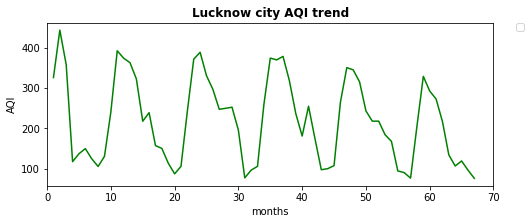

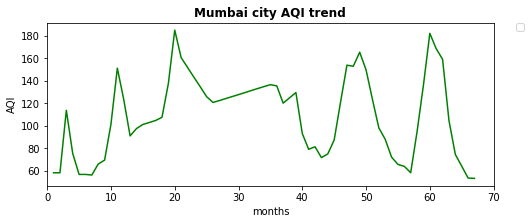

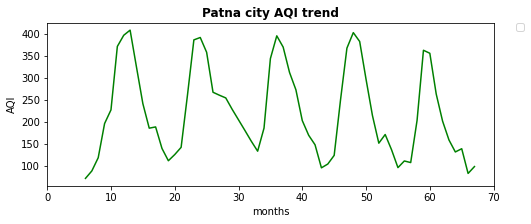

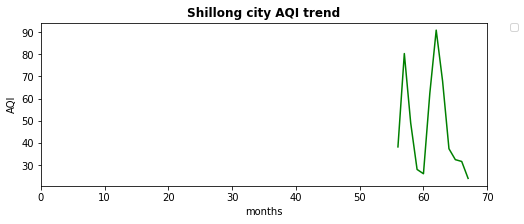

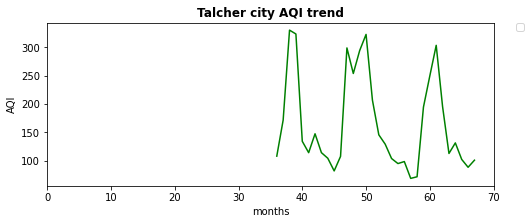

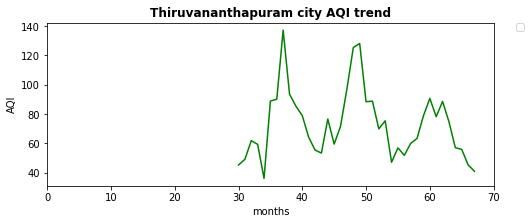

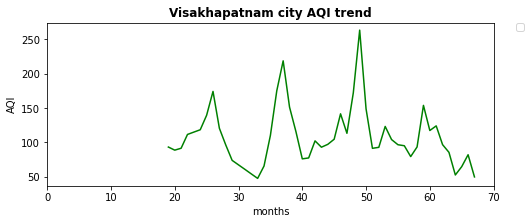

In [7]:
for city in df.City.unique():
  aqi_trend(city)

In [18]:
df_group=df.groupby(df.City)

In [10]:
df.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [19]:
df_ahm=df_group.get_group("Ahmedabad").reset_index()['AQI']
df_aiz=df_group.get_group("Aizawl").reset_index()['AQI']
df_ama=df_group.get_group("Amaravati").reset_index()['AQI']
df_amr=df_group.get_group("Amritsar").reset_index()['AQI']
df_ben=df_group.get_group("Bengaluru").reset_index()['AQI']
df_bho=df_group.get_group("Bhopal").reset_index()['AQI']
df_brj=df_group.get_group("Brajrajnagar").reset_index()['AQI']
df_cha=df_group.get_group("Chandigarh").reset_index()['AQI']
df_che=df_group.get_group("Chennai").reset_index()['AQI']
df_coi=df_group.get_group("Coimbatore").reset_index()['AQI']
df_del=df_group.get_group("Delhi").reset_index()['AQI']
df_ern=df_group.get_group("Ernakulam").reset_index()['AQI']
df_gur=df_group.get_group("Gurugram").reset_index()['AQI']
df_guw=df_group.get_group("Guwahati").reset_index()['AQI']
df_hyd=df_group.get_group("Hyderabad").reset_index()['AQI']
df_jai=df_group.get_group("Jaipur").reset_index()['AQI']
df_jor=df_group.get_group("Jorapokhar").reset_index()['AQI']
df_koc=df_group.get_group("Kochi").reset_index()['AQI']
df_kol=df_group.get_group("Kolkata").reset_index()['AQI']
df_luc=df_group.get_group("Lucknow").reset_index()['AQI']
df_mum=df_group.get_group("Mumbai").reset_index()['AQI']
df_pat=df_group.get_group("Patna").reset_index()['AQI']
df_shi=df_group.get_group("Shillong").reset_index()['AQI']
df_tal=df_group.get_group("Talcher").reset_index()['AQI']
df_thi=df_group.get_group("Thiruvananthapuram").reset_index()['AQI']
df_vis=df_group.get_group("Visakhapatnam").reset_index()['AQI']

In [43]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_ahm=scaler.fit_transform(np.array(df_ahm).reshape(-1,1))
df_aiz=scaler.fit_transform(np.array(df_aiz).reshape(-1,1))
df_ama=scaler.fit_transform(np.array(df_ama).reshape(-1,1))
df_amr=scaler.fit_transform(np.array(df_amr).reshape(-1,1))
df_ben=scaler.fit_transform(np.array(df_ben).reshape(-1,1))
df_bho=scaler.fit_transform(np.array(df_bho).reshape(-1,1))
df_brj=scaler.fit_transform(np.array(df_brj).reshape(-1,1))
df_cha=scaler.fit_transform(np.array(df_cha).reshape(-1,1))
df_che=scaler.fit_transform(np.array(df_che).reshape(-1,1))
df_coi=scaler.fit_transform(np.array(df_coi).reshape(-1,1))
df_del=scaler.fit_transform(np.array(df_del).reshape(-1,1))
df_ern=scaler.fit_transform(np.array(df_ern).reshape(-1,1))
df_gur=scaler.fit_transform(np.array(df_gur).reshape(-1,1))
df_guw=scaler.fit_transform(np.array(df_guw).reshape(-1,1))
df_hyd=scaler.fit_transform(np.array(df_hyd).reshape(-1,1))
df_jai=scaler.fit_transform(np.array(df_jai).reshape(-1,1))
df_jor=scaler.fit_transform(np.array(df_jor).reshape(-1,1))
df_koc=scaler.fit_transform(np.array(df_koc).reshape(-1,1))
df_kol=scaler.fit_transform(np.array(df_kol).reshape(-1,1))
df_luc=scaler.fit_transform(np.array(df_luc).reshape(-1,1))
df_mum=scaler.fit_transform(np.array(df_mum).reshape(-1,1))
df_pat=scaler.fit_transform(np.array(df_pat).reshape(-1,1))
df_shi=scaler.fit_transform(np.array(df_shi).reshape(-1,1))
df_tal=scaler.fit_transform(np.array(df_tal).reshape(-1,1))
df_thi=scaler.fit_transform(np.array(df_thi).reshape(-1,1))
df_vis=scaler.fit_transform(np.array(df_vis).reshape(-1,1))

In [45]:
##splitting dataset into train and test split
training_size_ahm=int(len(df_ahm)*0.80)
test_size_ahm=len(df_ahm)-training_size_ahm
train_data_ahm,test_data_ahm=df_ahm[0:training_size_ahm,:],df_ahm[training_size_ahm:len(df_ahm),:1]

In [46]:
training_size_ahm,test_size_ahm

(1607, 402)

In [48]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [49]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train_ahm, y_train_ahm = create_dataset(train_data_ahm, time_step)
X_test_ahm, ytest_ahm = create_dataset(test_data_ahm, time_step)

In [50]:
print(X_train_ahm.shape), print(y_train_ahm.shape)

(1506, 100)
(1506,)


(None, None)

In [51]:
print(X_test_ahm.shape), print(ytest_ahm.shape)

(301, 100)
(301,)


(None, None)

In [52]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_ahm =X_train_ahm.reshape(X_train_ahm.shape[0],X_train_ahm.shape[1] , 1)
X_test_ahm = X_test_ahm.reshape(X_test_ahm.shape[0],X_test_ahm.shape[1] , 1)

In [53]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [54]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(X_train_ahm,y_train_ahm,validation_data=(X_test_ahm,ytest_ahm),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 [==============================] - 9s 201ms/step - loss: 0.1448 - val_loss: 0.0710
Epoch 2/100
24/24 [==============================] - 4s 158ms/step - loss: 0.0331 - val_loss: 0.0657
Epoch 3/100
24/24 [==============================] - 4s 159ms/step - loss: 0.0283 - val_loss: 0.0565
Epoch 4/100
24/24 [==============================] - 4s 162ms/step - loss: 0.0278 - val_loss: 0.0521
Epoch 5/100
24/24 [==============================] - 4s 157ms/step - loss: 0.0269 - val_loss: 0.0552
Epoch 6/100
24/24 [==============================] - 4s 162ms/step - loss: 0.0272 - val_loss: 0.0559
Epoch 7/100
24/24 [==============================] - 4s 159ms/step - loss: 0.0280 - val_loss: 0.0518
Epoch 8/100
24/24 [==============================] - 4s 156ms/step - loss: 0.0275 - val_loss: 0.0549
Epoch 9/100
24/24 [==============================] - 4s 159ms/step - loss: 0.0269 - val_loss: 0.0551
Epoch 10/100
24/24 [==============================] - 4s 161ms/step - loss: 0.0263 - val_lo

In [57]:
### Lets Do the prediction and check performance metrics
train_predict_ahm=model.predict(X_train_ahm)
test_predict_ahm=model.predict(X_test_ahm)

In [58]:
##Transformback to original form
train_predict_ahm=scaler.inverse_transform(train_predict_ahm)
test_predict_ahm=scaler.inverse_transform(test_predict_ahm)

In [59]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train_ahm,train_predict_ahm))

306.1759152486262

In [60]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest_ahm,test_predict_ahm))

254.21564865532616

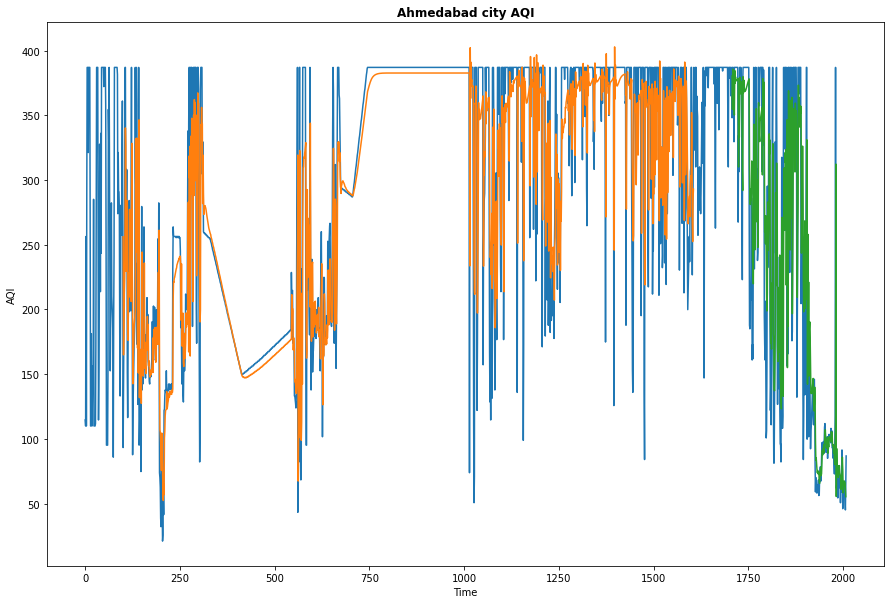

In [63]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot_ahm = numpy.empty_like(df_ahm)
trainPredictPlot_ahm[:, :] = np.nan
trainPredictPlot_ahm[look_back:len(train_predict_ahm)+look_back, :] = train_predict_ahm
# shift test predictions for plotting
testPredictPlot_ahm = numpy.empty_like(df_ahm)
testPredictPlot_ahm[:, :] = numpy.nan
testPredictPlot_ahm[len(train_predict_ahm)+(look_back*2)+1:len(df_ahm)-1, :] = test_predict_ahm
# plot baseline and predictions
plt.figure(figsize=(15,10))
plt.plot(scaler.inverse_transform(df_ahm))
plt.plot(trainPredictPlot_ahm)
plt.plot(testPredictPlot_ahm)
plt.xlabel("Time")
plt.ylabel("AQI")
plt.title("Ahmedabad city AQI",fontweight="bold")
plt.show()

In [32]:
frames=[df_ahm,df_aiz,df_ama,df_amr,df_ben,df_bho,df_brj,df_cha,df_che,df_coi,df_del,df_ern,df_gur,df_guw,df_hyd,df_jai,df_jor,df_koc,df_kol,df_luc,df_mum,df_pat,df_shi,df_tal,df_thi,df_vis]

In [ ]:
df_ahm=df_group.get_group("Ahmedabad")
df_aiz=df_group.get_group("Aizawl")
df_ama=df_group.get_group("Amaravati")
df_amr=df_group.get_group("Amritsar")
df_ben=df_group.get_group("Bengaluru")
df_bho=df_group.get_group("Bhopal")
df_brj=df_group.get_group("Brajrajnagar")
df_cha=df_group.get_group("Chandigarh")
df_che=df_group.get_group("Chennai")
df_coi=df_group.get_group("Coimbatore")
df_del=df_group.get_group("Delhi")
df_ern=df_group.get_group("Ernakulam")
df_gur=df_group.get_group("Gurugram")
df_guw=df_group.get_group("Guwahati")
df_hyd=df_group.get_group("Hyderabad")
df_jai=df_group.get_group("Jaipur")
df_jor=df_group.get_group("Jorapokhar")
df_koc=df_group.get_group("Kochi")
df_kol=df_group.get_group("Kolkata")
df_luc=df_group.get_group("Lucknow")
df_mum=df_group.get_group("Mumbai")
df_pat=df_group.get_group("Patna")
df_shi=df_group.get_group("Shillong")
df_tal=df_group.get_group("Talcher")
df_thi=df_group.get_group("Thiruvananthapuram")
df_vis=df_group.get_group("Visakhapatnam")